# Business Understanding

Objetive : The objective of the problem is to evaluate the income of individuals based on various factors like age, workclass, 
          education, occupation adn race etc. using classification models.

In [72]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [73]:
df1=pd.read_csv("income_evaluation.csv")
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# EDA

In [75]:
df1.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [76]:
df[" education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [77]:
df[' marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [78]:
df[' income'].unique()

array([' <=50K', ' >50K'], dtype=object)

<AxesSubplot:>

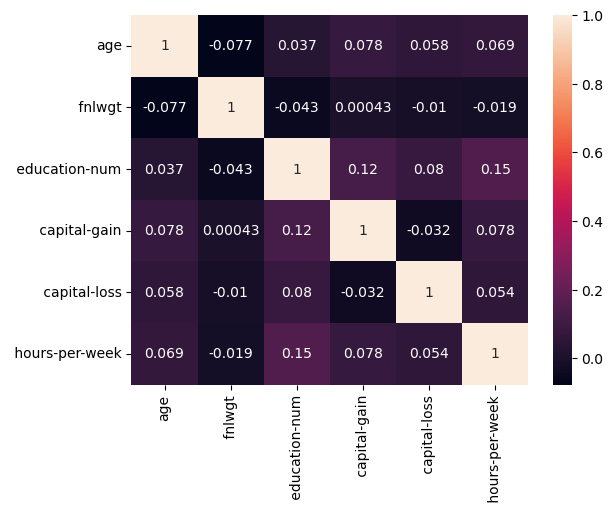

In [79]:
sns.heatmap(data=df.corr(),annot=True)

<AxesSubplot:xlabel=' workclass', ylabel=' education'>

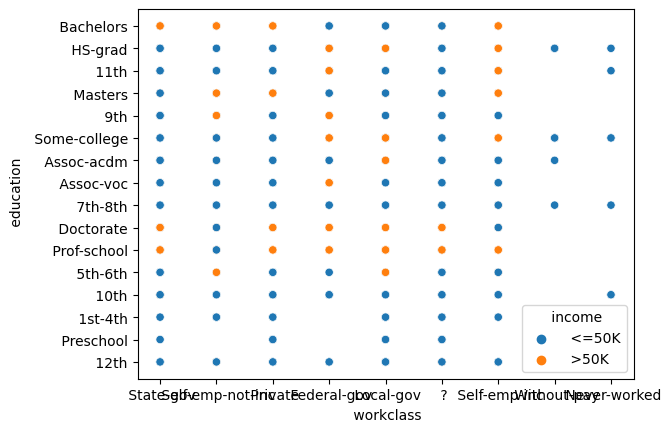

In [80]:
sns.scatterplot(x=" workclass",y=" education",data=df,hue=" income")

<AxesSubplot:xlabel=' hours-per-week', ylabel=' education'>

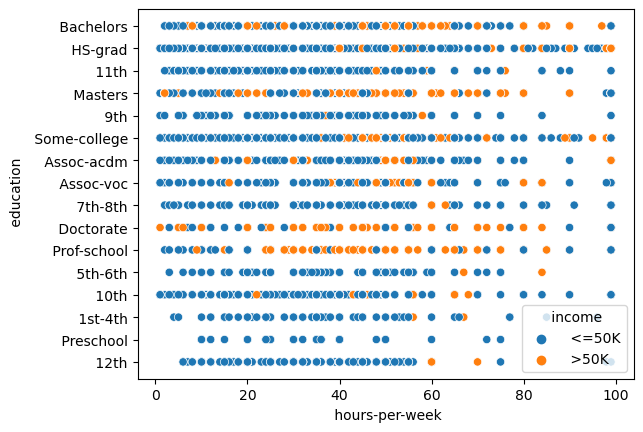

In [81]:
sns.scatterplot(x=" hours-per-week",y=" education",data=df,hue=" income")

In [82]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

Create x and y

In [83]:
x=pd.get_dummies(df.drop(" income",axis=1),drop_first=True)
y=df[" income"]

TTS

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

# creating pipeline

In [85]:
LogisticRegressionPipeline=Pipeline([("myscaler",MinMaxScaler()),("mypca",PCA(n_components=3)),
                                                ("logistic regression",LogisticRegression())])

KNNPipeline=Pipeline([("myscaler",MinMaxScaler()),("mypca",PCA(n_components=3)),
                                                ("knn",KNeighborsClassifier())])

SVCPipeline=Pipeline([("myscaler",MinMaxScaler()),("mypca",PCA(n_components=3)),
                                                ("svc",SVC())])

DTPipeline=Pipeline([("myscaler",MinMaxScaler()),("mypca",PCA(n_components=3)),
                                                ("DT",DecisionTreeClassifier())])

RFPipeline=Pipeline([("myscaler",MinMaxScaler()),("mypca",PCA(n_components=3)),
                                                ("RF",RandomForestClassifier())])

AdaboostPipeline=Pipeline([("myscaler",MinMaxScaler()),("mypca",PCA(n_components=3)),
                                                ("Adaboost",AdaBoostClassifier())])

GradientPipeline=Pipeline([("myscaler",MinMaxScaler()),("mypca",PCA(n_components=3)),
                                                ("Gradient",GradientBoostingClassifier())])

# Modelling

Defining pipeline in a list

In [86]:
mypipeline=[LogisticRegressionPipeline,KNNPipeline,SVCPipeline,DTPipeline,RFPipeline,AdaboostPipeline,GradientPipeline]

Fitting the pipeline

In [87]:
for mypipe in mypipeline:
    mypipe.fit(x_train,y_train)

Creating Dictionary of pipelines

In [88]:
pipelinedict={0:"Logistic Regression",1:"KNN", 2:"SVC", 3:"DT", 4:"RF", 5:"Ada", 6:"Gradient"}

Getting test accuracy for all models

In [89]:
for i,model in enumerate(mypipeline):
    print("{} Test Accuracy: {}".format(pipelinedict[i],model.score(x_test,y_test)))

Logistic Regression Test Accuracy: 0.8036235221863964
KNN Test Accuracy: 0.8215875940426839
SVC Test Accuracy: 0.809765085214187
DT Test Accuracy: 0.7770612620912022
RF Test Accuracy: 0.8134500230308613
Ada Test Accuracy: 0.8051589129433441
Gradient Test Accuracy: 0.8177491171503147


# Final Model (KNN)

In [90]:
estimator=KNeighborsClassifier()
para_grid={"n_neighbors":[1,2,3,4,5]}
hpmodel=GridSearchCV(estimator,para_grid,cv=5,scoring="accuracy")
hpmodel.fit(x_train,y_train)
hpmodel.best_params_

{'n_neighbors': 4}

In [91]:
#Rebuilding Model
newmodel=KNeighborsClassifier(n_neighbors=4)
newmodel.fit(x_train,y_train)
ypredtrain=newmodel.predict(x_train)
ypredtest=newmodel.predict(x_test)
print("Train score:",newmodel.score(x_train,y_train))
print("Test score:",newmodel.score(x_test,y_test))

Train score: 0.8318105036855037
Test score: 0.8042376784891755
